In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
B_ratio=1e-10
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
emittance=14*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=B_ratio,
                                         Neutralisation_space_charge=0,Neutralisation_rotation=0)                

TypeError: ElectronCooler.__init__() got an unexpected keyword argument 'I'

In [3]:
r=np.arange(start=-20*1e-3, stop=20*1e-3, step=1e-3)


#for r in r:

dE_E = (1.2e-4*I/(beta_rel**3))*(r/r_beam)**2


E = dtk_cooler.beta_to_kinetic_energy(beta_rel, dtk_cooler.me_ev)# + Pb_m0_MeV_c2 #Mev/c^2
E_diff = dE_E*E
E_tot = E + E_diff
beta2=dtk_cooler.kinetic_energy_to_beta(E_tot, dtk_cooler.me_ev)
#beta_ratio = beta2/beta
beta_diff = beta2-beta_rel

p0 = beta_rel*dtk_cooler.me_ev*gamma
p2 = beta2*dtk_cooler.me_ev*gamma

dp_p=(p2-p0)/p0

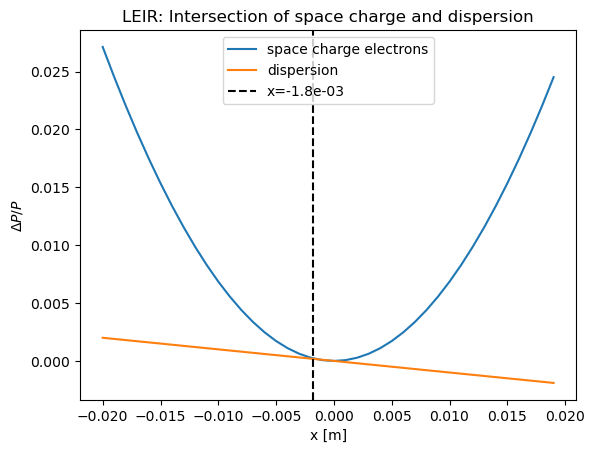

In [17]:
plt.figure()
plt.plot(r,dp_p,label='space charge electrons')
plt.plot(r,r/-10,label='dispersion')

idx = np.abs(dp_p - (-1/10*r[:,np.newaxis])).argmin(axis=1)

# Find the intersection point by taking the average of the r values at the index where the two lines are closest
intersection = np.mean(r[idx])

# Plot the intersection point as a vertical line
plt.axvline(intersection, linestyle='--', color='k',label=f'x={intersection:.1e}')

plt.title('LEIR: Intersection of space charge and dispersion')
plt.xlabel('x [m]')
plt.ylabel('$\Delta P/P$')
plt.legend()

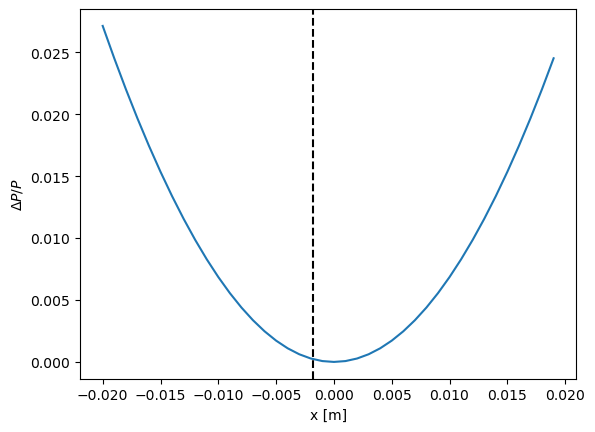

In [11]:
plt.figure()
plt.plot(r,dp_p)
#plt.plot(r,-10*r)

plt.xlabel('x [m]')
plt.ylabel('$\Delta P/P$')
# Find the index of the value in dp_p that is closest to each value in -10*r
idx = np.abs(dp_p - (-1/10*r[:,np.newaxis])).argmin(axis=1)

# Find the intersection point by taking the average of the r values at the index where the two lines are closest
intersection = np.mean(r[idx])

# Plot the intersection point as a vertical line
plt.axvline(intersection, linestyle='--', color='k')

# Display the plot
plt.show()
